In [1]:
import pandas as pd
import numpy as np
import shelve 

from importlib import reload

%matplotlib inline

In [2]:
# from gameplan.user import User
# import gameplan.paths as paths
# from gameplan.user_input import main

In [38]:
import gameplan.helpers as hp
import gameplan.income_streams
import gameplan.expenses
import gameplan.user

reload(gameplan.income_streams)
reload(gameplan.expenses)
reload(gameplan.user)
from gameplan.income_streams import IncomeStream, Salary
from gameplan.user import User


In [49]:
usr = User('a@gma.co')
r = gameplan.expenses.Rent(3000)
u = gameplan.expenses.Utilities(125)
misc = gameplan.expenses.Expense(
    expense_type='miscellaneous_expenses', 
    amount=5000, 
    recurring=True, 
    start_dt=pd.datetime.today(),
    freq='M'
)
s = Salary(120000/24, payday_freq='SM', next_paycheck_dt=hp.get_offset_date('SM', pd.datetime(2019,7,4)))

In [50]:
usr.add_income_stream(s)
for exp in [r, u, misc]:
    usr.add_expense(exp)

In [5]:
s = Salary(150000/24, payday_freq='SM', next_paycheck_dt=hp.get_offset_date('SM', pd.datetime(2019,7,4)))

In [6]:
s.annualized_salary

150000.0

In [90]:
a = pd.datetime.today()

In [94]:
b = pd.tseries.frequencies.to_offset('SM')

In [117]:
def get_offset_date(freq, ref_date=pd.datetime.today()):
    offset = pd.tseries.frequencies.to_offset(freq)
    return offset.rollforward(ref_date)

In [16]:
a = pd.tseries.frequencies.get_period_alias()

In [24]:
pd.date_range(
            start=pd.datetime.today(),
            end=pd.datetime.today() + pd.DateOffset(years=1),
            freq='MS',
            normalize=True
        )

DatetimeIndex(['2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', freq='MS')

In [14]:
pd.datetime.today() + a

Timestamp('2019-12-31 16:49:38.989558')

In [97]:
b.rollforward(pd.datetime.today())

Timestamp('2019-06-15 16:05:54.471918')

In [ ]:
pd.offsets.

In [89]:
pd.DateOffset.rollforward(pd.datetime.today(), 'SM')

ValueError: could not convert string to Timestamp

In [ ]:
pd.offsets.

In [59]:
inc.cash_flows.groupby(pd.Grouper(level=0, freq='365D')).sum()

,salary
2019-06-15,150000.0
2020-06-14,150000.0
2021-06-14,150000.0


In [ ]:
inc.cash_flows.groupby(a)

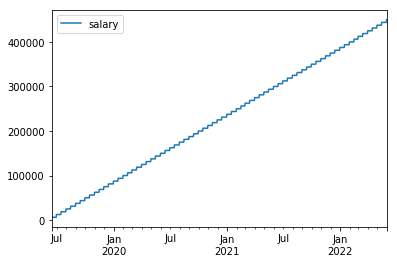

In [48]:
inc.plot_cash_flows(cumulative=True )

In [14]:
inc.

'Y'

In [ ]:
FREQ_MAP = {
    'Y': {
        'offset': pd.DateOffset(years=1),
    }
}

In [15]:
FREQ_MAP.get(inc.freq, inc.freq)

AttributeError: 'IncomeStream' object has no attribute 'FREQ_MAP'

In [3]:
gameplan.income_streams

AttributeError: module 'gameplan' has no attribute 'income_streams'

In [4]:
reload(gameplan)

NameError: name 'reload' is not defined

In [ ]:
gameplan.

In [3]:
u = main()

Hi! Today we're gonna... Let's get started!

Please enter your email address
david@ls.com
Hey david@ls.com, we've found your record and have loaded your profile!

Are you currently earning a salary? [Type: Yes or No]
Yes

How much do you earn before taxes? (Enter whatever's easiest: per week/month/year)
180000

Is that per week, month, or year?
year

How often do you get paid? [Select what's closest: weekly, bi-weekly, twice monthly, monthly
bi-weekly

When's your next paycheck? (Please enter in YYYY-MM-DD format)
2019-05-05


We estimate your tax rate is 35%, would you like to change this estimate?
    (If so, please enter a %, otherwise skip)

45%

Based on these inputs we estimate that you're taking home about $4,125
from every twice monthly paycheck, or $99,000 a year.

Lets try to understand where that goes:

Do you rent or own your residence? (Type 'rent' or 'own')
rent

How much is your rent per month?
1450

How much are your utilities per month?
225

What about other (consisten

In [8]:
class Asset():
    def __init__(self, asset_type):
        self.asset_type = asset_type

In [71]:
class CashSavings(Asset):
    def __init__(self, annualized_interest_rate):
        super().__init__('cash_savings')
        self.interest_rate = interest_rate
        self.contributions = []

    def add_contribution(self, amount, date, label, recurring=False, freq=None, periods=None):
        if not recurring:
            date_range = pd.date_range(
                start=date, 
                periods=1, 
                freq='D',
                normalize=True
            )   
        else:
            date_range = pd.date_range(
                start=date,
                freq=freq,
                periods=periods,
                normalize=True
            )

        contrib = pd.DataFrame(
            index=date_range,
            data=[amount]*len(date_range),
            columns=[label]
        )

        self.contributions.append(contrib)
    
    @property
    def all_contributions(self):
        df = (
            pd.concat(self.contributions, axis=1)
            .fillna(0)
            .cumsum()
        )
        df['total_contributions'] = df.sum(axis=1)
        return df
    
#     @property
#     def daily_interest_rate(self):
#         """TO DO: Calc this the right way"""
#         return annualized_interest_rate/365
    
#     def interest_pmts(self):
#         """TO DO: Maybe this should be discrete like when the pmts are actually made? Doesn't matter for now"""
#         interest = self.daily_interest_rate
#         return  self.all_contributions.total_value
        
    def value_through_time(self):
        pass
    
    def value_at_a_given_point_in_time(self, dt):
        pass
    
    def expected_value_through_time(self, periods, freq='d'):
#         self.date_range = pd.date_range(
#             start=next_paycheck_dt,
#             periods=(years * self._annual_pmt_periods),
#             freq=self._pmt_freqs
#         )
        pass


In [64]:
rt = 0.01/365


In [ ]:
5 * (1+rt).cumprod()

In [ ]:
        observed_wage_change.apply(lambda x: x+1).cumprod(axis=1).apply(lambda x: x*salary).reset_index()


In [61]:
sav = CashSavings(0.01)

In [62]:
sav.add_contribution(40000, pd.datetime.today(), 'existing_savings')
sav.add_contribution(500, u.salary.date_range[1], 'salary_contrib', recurring=True, freq='M', periods=12*10)

In [70]:
daily_value = sav.all_contributions.resample('D').pad()

In [72]:
daily_value['interest_rate'] = 0.01/365

In [75]:
(daily_value.interest_rate + 1).cumprod()

2019-04-28    1.000027
2019-04-29    1.000055
2019-04-30    1.000082
2019-05-01    1.000110
2019-05-02    1.000137
2019-05-03    1.000164
2019-05-04    1.000192
2019-05-05    1.000219
2019-05-06    1.000247
2019-05-07    1.000274
2019-05-08    1.000301
2019-05-09    1.000329
2019-05-10    1.000356
2019-05-11    1.000384
2019-05-12    1.000411
2019-05-13    1.000438
2019-05-14    1.000466
2019-05-15    1.000493
2019-05-16    1.000521
2019-05-17    1.000548
2019-05-18    1.000576
2019-05-19    1.000603
2019-05-20    1.000630
2019-05-21    1.000658
2019-05-22    1.000685
2019-05-23    1.000713
2019-05-24    1.000740
2019-05-25    1.000767
2019-05-26    1.000795
2019-05-27    1.000822
                ...   
2029-04-01    1.104473
2029-04-02    1.104503
2029-04-03    1.104534
2029-04-04    1.104564
2029-04-05    1.104594
2029-04-06    1.104625
2029-04-07    1.104655
2029-04-08    1.104685
2029-04-09    1.104715
2029-04-10    1.104746
2029-04-11    1.104776
2029-04-12    1.104806
2029-04-13 

In [ ]:
# I'm going to contribute $X or Y% of every paycheck to my savings

In [ ]:
# Model as a perpetuity; 1. Frequency of cashflow 2. amount 3. interest rate 4. term
# Frequency = 'M'
# Amount = 200
# i = 0.01
# term = 20 years
# Start Date = '2019-06-01'

In [ ]:
* Types:
    1. Salary
    2. Bonus
    3. Tax return
    4. Dividends?
    5. Inheritance
    6. 

In [21]:
date_range = pd.date_range(
    start='2019-06-01',
    periods=20*12,
    freq='M'
)

df = pd.DataFrame(
    index=date_range,
    data=[200]*len(date_range),
    columns=['savings_from_salary']
)

In [15]:
a.asset_type

'savings_account'

In [ ]:
    def __init__(self, ticker, shares=None, share_price=None, expected_growth=None, vol=None):
        self.ticker=ticker
        self.shares=shares
        self.share_price = share_price if share_price else self.get_share_price(ticker)
        self.expected_growth = expected_growth if expected_growth else self.get_expected_growth(ticker)
        self.vol = vol if vol else self.get_vol(ticker)

    def get_share_price(self, ticker):
        ## TO DO
        return None

    def get_expected_growth(self, ticker):
        ## TO DO
        return None

    def get_vol(self, ticker):
        ## TO DO
        return None

    def simulate_path(self, periods):
        daily_growth = self.expected_growth/365
        daily_vol = self.vol/365
        daily_returns = 1 + np.random.normal(daily_growth, daily_vol, periods)
        price_path = self.share_price * np.cumprod(daily_returns)

        return price_path

    def get_price_paths(self, n_paths, periods=365):
        if not hasattr(self, '_price_paths'):
            self._price_paths = []
        for x in range(n_paths):
            self._price_paths.append(self.simulate_path(periods=periods))

In [ ]:
Asset('savings_account', )

In [9]:
St = Stock('SPY', shares=investments*portfolio['stock']/spy_price, share_price=spy_price, 
           expected_growth=0.07, vol=1)

NameError: name 'Stock' is not defined

In [10]:
St.get_price_paths(10000)
len(St._price_paths)

NameError: name 'St' is not defined

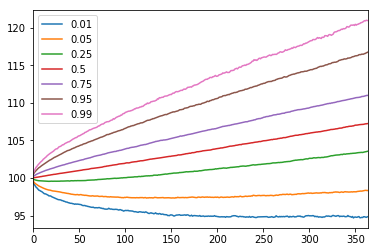

In [130]:
pd.DataFrame(St._price_paths).quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T.plot()

# Goals
1. Stock class that appreciates in value stochastically
2. Liability class
3. Net worth
4. Simulate after 1 year
5. Translate into a confidence interval

In [41]:
TIME_HORIZON_YEARS = 5

age = 28
salary = 150000 #
taxes = .35 #

investments = 40000
portfolio = {
    'stock': 1.0,
    'bond': 0
}

cash = 20000

rent = 1200 * 12
living_expenses = 4000 * 12
expenses = rent + living_expenses

debt = 60000
apr = .06



#Other inputs
spy_price = 100

In [387]:
### TO DO: General solution to converting a thing to a timeseries

class User():
    def __init__(self, email):
        self.email = email
        self.user_id = hash(email)
        self.salary = None
        self.expenses = []
#         self.income_streams = []

        
#         self.assets = None
#         self.liabilities = None
#         self.gender = gender

    @property
    def income_streams(self):
        return [self.salary]    
        
    @property
    def income_streams_df(self):
        """Think about temporal aspect heere too"""
        df = pd.concat([x.cash_flows for x in u.income_streams], axis=1)
        df['total_income'] = df.sum(axis=1)
        
        return df
        
    @property
    def total_income(self):
        return self.income_streams_df.total_income
    
    @property
    def expenses_df(self):
        """Think about temporal aspect heere too"""
        df = pd.concat([x.cash_flows for x in u.expenses], axis=1)
        df['total_expenses'] = df.sum(axis=1)
        
        return df
    
    @property
    def total_expenses(self):
        return self.expenses_df.total_expenses
    
    
    @property
    def cash_flows_df(self):
        df = pd.concat([
            self.income_streams_df, 
            -self.expenses_df
        ], axis=1).fillna(0)
        
        return df
    
    def agg_cash_flows(self, freq):
        return self.cash_flows_df.resample(freq).sum()
    
    @property
    def net_cash_flow(self):
        df = self.cash_flows_df
        return df['total_income'] + df['total_expenses']
    
    def agg_net_cash_flows(self, freq):
        return self.net_caash_flow.resample(freq).sum()
    
    @property
    def assets(self):
        return 5

    @property
    def liabilities(self):
        return -2

    @property
    def net_worth(self):
        """How to handle the temporal aspect of this?"""
        return self.assets + self.liabilities
#         pass

 
class CashFlow():
    pass

class Salary():
    def annualize_salary(self, salary, fmt):
        if fmt.lower() == 'year':
            salary_annualized = salary
        elif fmt.lower() == 'month':
            salary_annualized = 12*salary
        elif fmt.lower() == 'week':
            salary_annualized = 52*salary
        else: 
            raise ValueError("fmt.lower() must be one of ['year', 'month', 'week']")
        
        return salary_annualized

    def __init__(self, salary, sal_fmt, sal_freq , next_paycheck_dt, years=1, tax_withholding_rate=0.35):
        self.salary_annualized = self.annualize_salary(float(salary), sal_fmt)
        self.FREQ_MAP = {
            'weekly': dict(periods=52, freq='7D'),
            'bi-weekly': dict(periods=26, freq='14D'),
            'twice monthly': dict(periods=24, freq='SM'), # [1st and 15th ('SMS') or 15th and last day of month ('SM)]
            'monthly': dict(periods=12, freq=pd.DateOffset(months=1, day=next_paycheck_dt.day))
        }
        self.payday_freq = sal_freq
        self._annual_pmt_periods = self.FREQ_MAP.get(sal_freq).get('periods')
        self._pmt_freqs = self.FREQ_MAP.get(sal_freq).get('freq')
        self._pmt_size = self.salary_annualized/self._annual_pmt_periods
        
        self.date_range = pd.date_range(
            start=next_paycheck_dt, 
            periods=(years * self._annual_pmt_periods), 
            freq=self._pmt_freqs
        )
        
        self.tax_withholding_rate = tax_withholding_rate
    
    
    @property
    def cash_flow(self):
        pmt = self._pmt_size * (1 - self.tax_withholding_rate)
        ## TO DO: consider adding other witholding stuff
        return pmt
    
    
    @property
    def cash_flows(self):
        pmt = self.cash_flow
        df =  pd.DataFrame(
            index=self.date_range, 
            data=[pmt]*len(self.date_range), 
            columns=['salary']
        )
        # Consider adding columns for [salary, after-tax, after withholding, etc.]
        
        return df
        
        
    def plot_salary_pmts(self, **kwargs):
        self.cash_flows.resample('d').mean().cumsum().fillna(method='ffill').plot(**kwargs)
        

In [ ]:
1. Positive & negative cashflows
2. Assets & liabilities

In [346]:
u.expenses_df

,rent,utilities,other,total_expenses
2019-05-31,1450.0,225.0,6000.0,7675.0
2019-06-30,1450.0,225.0,6000.0,7675.0
2019-07-31,1450.0,225.0,6000.0,7675.0
2019-08-31,1450.0,225.0,6000.0,7675.0
2019-09-30,1450.0,225.0,6000.0,7675.0
2019-10-31,1450.0,225.0,6000.0,7675.0
2019-11-30,1450.0,225.0,6000.0,7675.0
2019-12-31,1450.0,225.0,6000.0,7675.0
2020-01-31,1450.0,225.0,6000.0,7675.0
2020-02-29,1450.0,225.0,6000.0,7675.0


In [352]:
class Expense():
    FREQ_CONFIG = {
        'M': dict(
            start=pd.datetime.today() + pd.offsets.MonthBegin(normalize=True),
            periods=12,
            freq='MS'
        )
    } 
    
    def __init__(self, exp_type, amount, freq):
        self.exp_type = exp_type
        self.amount = amount
        self.freq = freq
        self._freq_config = self.FREQ_CONFIG.get(self.freq)
        self._date_range = pd.date_range(
            start=self._freq_config['start'],
            periods=self._freq_config['periods'],
            freq=self._freq_config['freq'],
        )
        
        
    @property
    def cash_flows(self):
        df =  pd.DataFrame(
            index=self._date_range, 
            data=[self.amount]*len(self._date_range), 
            columns=[self.exp_type]
        )

        return df

class Rent(Expense):
    def __init__(self, amount, freq='M'):
        """TO DO: include a date_of_pmt thing?"""
        super().__init__(exp_type='rent', amount=amount, freq=freq)

        
class Utilities(Expense):
    def __init__(self, amount, freq='M'):
        super().__init__(exp_type='utilities', amount=amount, freq=freq)
    

In [353]:
class Liability():
    def __init__(liability_type):
        self.liability_type = liability_type
        
class Asset():
    def __init__(asset_type):
        self.asset_type = asset_type
        

## Are you currently earning a salary?
- Yes 
-> How much do you earn a [week / month / year] before taxes?
-> How often do you get paid? [bi-weekly | twice a month | other (every xx days)]
-> We estimate your tax rate is XX%, would you like to change this estimate? [We estimate your take home pay is ~65% of your paycheck]
-> [Withholding]
-> Do you put any % of your paycheck in a 401k? If so, does your employer match any % of it?
-> Do you get employer health insurance? Do you pay for it?
-> We calculate that you have ~$YYY dollars remaining from every paycheck, lets try to understand where that goes:
* Do you rent or own your residence?
- How much of your paycheck goes to rent/mortgage per month? [DB: If mortgage, need different flow for maintenance and shit; One potential value-add is highlighting expenses that tend to be highly variable] 
* Utilities?
* Food/Groceries? [Per Month | week]
* Transportation (E.g. Metrocard, Car + Insurance + Gas, citibike, etc.) [Per Month | week]
-> Alright, after expenses it seems like you have $ZZ dollars left over per month, we can either assume that money goes into a savings account or you can give us some more details on where you think it's going. Please check all that apply:
* Savings
* Investment
* Paying down debt, e.g. [Student, credit card, (mortgage?)]
* Consumption
- Clothes
- Alcohol
- Restaurants/bars
- Entertainment, e.g. movies, baseball games, 
- Other: [     ]

-> Do you want to tell us more about any of those?

## Do you have any savings?
-> Cash in checking / savings accounts
-> Investments
* 401k (you told us you ...)
* Roth IRA
* Brokerage (e.g. TD Ameritrade, Vanguard, etc.)
--> What do you own?
* Stocks
* Bonds

## Do you have any debt?
-> Mortgage
-> Credit card
-> Student debt
-> Car Lease

## Tell us a little bit about yourself
-> Where do you live?
-> What do you do? / What industry are you in? [present some potential categories htat match from gov]
-> Are you married? Single? Getting engaged soon? When?
-> Kids?
-> Age
-> 

## Are you expecting any major new expenses? When?
[Is it a one-time expense or recurring?]
-> Having a kid
-> New car/home
-> Vaca
-> [ENTER BIG TICKET ITEM]



In [ ]:
Salary()